<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_Example_6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 9.4 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Closed loop TF =  
                                20
------------------------------------------------------------------
s^8 + s^7 + 12 s^6 + 22 s^5 + 39 s^4 + 59 s^3 + 48 s^2 + 38 s + 20

Poles =  [ 5.00000000e-01+3.122499j    5.00000000e-01-3.122499j
  1.27675648e-15+1.41421356j  1.27675648e-15-1.41421356j
 -1.00000001e+00+0.j         -9.99999993e-01+0.j
  7.21644966e-16+1.j          7.21644966e-16-1.j        ]
Zeros =  []


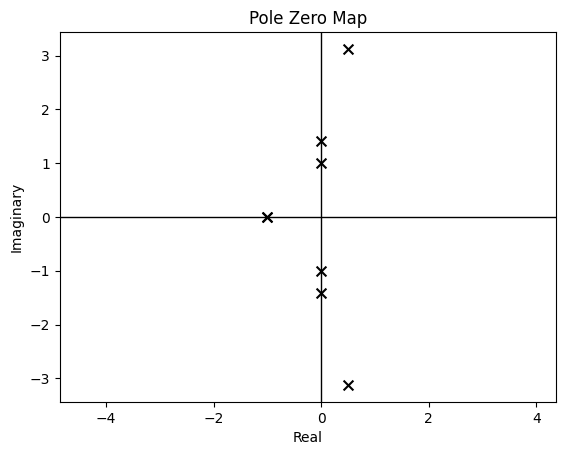

In [5]:
# Define your transfer function:
#TF(s) = 20 / (s^8+s^7+12s^6+22s^5+39s^4+59s^3+48s^2+38s+20)

# Coefficients of the numerator
num = [20]
# Coefficients of the denominator
den = [1, 1, 12, 22, 39, 59, 48, 38, 20]

TF = tf(num,den)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

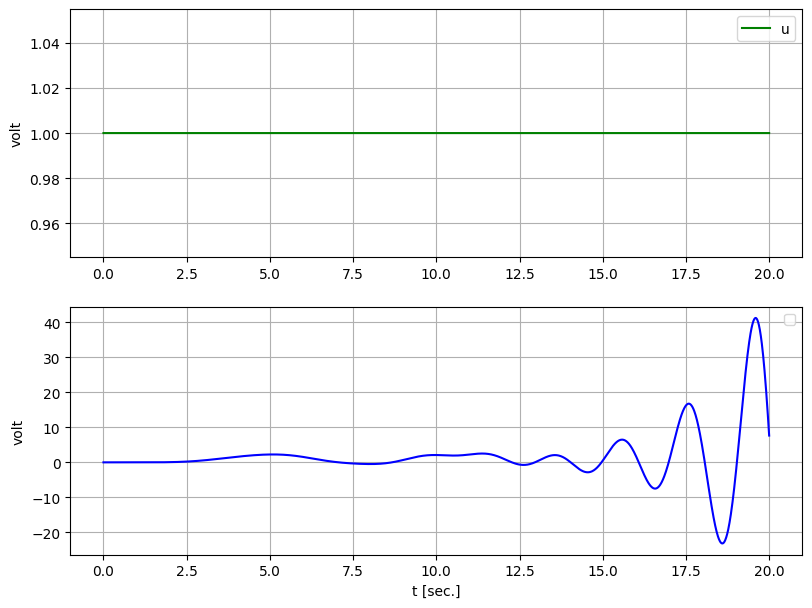

In [6]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.subplot(2,1,1)
plt.plot(t, u, "green")

plt.grid()
plt.legend(labels =("u"))
plt.ylabel("volt")

plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")